<h1>Download data</h1>

In [ ]:
from src.download import download

# Your data will be downloaded to the data folder
download()

<h1>Model</h1>

In [ ]:
import json
import pandas as pd
from src.load_data import load_data
from src.preprocessing import data_preprocessing
from src.model import Model


# stimuli = "MVC" 
# stimuli = "SVC"
for stimuli in ["MultipleVC", "SingleVC"]:
    data = load_data(f"{stimuli}.tsv")
    data = data_preprocessing(data)
    model = Model(data)
    for stack in range(1,6):
        results = model.leave_one_session_out_cross_validation(stack, 'ZR', 'DT', 'KNN', 'NB', 'SVM', 'LR', 'AB', 'RF')
        with open(f"results/results_leave_one_session_out_cross_validation_{stimuli}_{stack}.json", "w") as f:
            json.dump(results, f)

Results

In [26]:
import os
import pandas as pd
import json


def average(lst):
    return sum(lst) / len(lst)

model = "SVM"
accuracy_df = pd.DataFrame(columns=['Stack', 'Fold', 'Accuracy', 'Stimuli'])
for stimuli in ["MultipleVC", "SingleVC"]:
    for stack in range(1,6):
        with open(f"results/results_leave_one_session_out_cross_validation_{stimuli}_{stack}.json", "r") as f:
            this_result = json.load(f)
        for fold in range(1,6):
            this_acc = this_result[model][str(fold)]["accuracy"][0]
            this_df = pd.DataFrame({'Stack': stack, 'Fold': fold, 'Accuracy': this_acc, 'Stimuli': stimuli}, index=[0])
            accuracy_df = pd.concat([accuracy_df, this_df])

accuracy_df.reset_index(drop=True, inplace=True)
accuracy_df.to_csv(f"results/accuracy_{model}.csv", index=False)


C:\Users\scilab\AppData\Local\Temp\ipykernel_27100\2215215678.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  accuracy_df = pd.concat([accuracy_df, this_df])


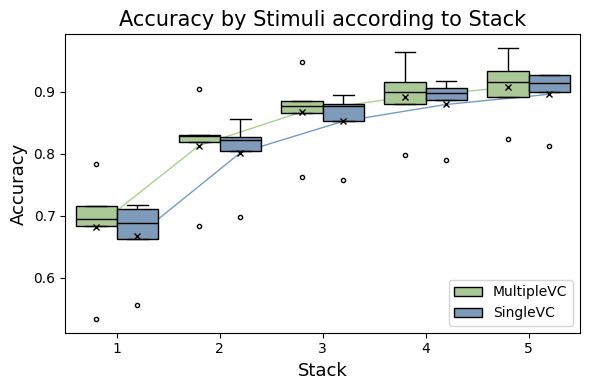

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("results/accuracy_SVM.csv")

# Compute the mean accuracies
mean_accuracies = df.groupby(["Stimuli", "Stack"])["Accuracy"].mean().reset_index()

# Set the order of the "Stimuli" and "Stack" categories
order_stimuli = ["MultipleVC","SingleVC"]
order_stack = df["Stack"].unique().tolist()

# Adjust the x-values for the SVC line plot
svc_mean = mean_accuracies[mean_accuracies['Stimuli'] == 'SingleVC'].copy()
svc_mean['Adjusted_Stack'] = svc_mean['Stack']-0.8


mvc_mean = mean_accuracies[mean_accuracies['Stimuli'] == 'MultipleVC'].copy()
mvc_mean['Adjusted_Stack'] = mvc_mean['Stack']-1.2



# Define custom colors for the boxplots
custom_palette = {
    "SingleVC":"#749BC3", 
    "MultipleVC": "#A9D18E",  # RGB: 169, 209, 142
}

custom_palette_line = {
    "SingleVC":"#749BC3", 
    "MultipleVC": "#A9D18E",  # RGB: 169, 209, 142
}

totalMean = pd.concat([mvc_mean,svc_mean])

# Plotting the boxplot
plt.figure(figsize=(6, 4))

ax = sns.lineplot(x="Adjusted_Stack", y="Accuracy", hue="Stimuli", data=totalMean, hue_order=order_stimuli,palette=custom_palette_line, linewidth=1,legend=False, zorder=0)
sns.boxplot(x="Stack", y="Accuracy", hue="Stimuli", data=df, hue_order=order_stimuli, palette=custom_palette, showmeans=True, meanprops={"marker":"x",
                                                                                                                                        "markerfacecolor":"white", 
                                                                                                                                        "markeredgecolor":"black",
                                                                                                                                        "markersize":"5"}, linewidth=1,linecolor="black", zorder=3, fliersize=3)

plt.title("Accuracy by Stimuli according to Stack", fontsize=15)
plt.ylabel('Accuracy', fontsize=13)
plt.xlabel('Stack', fontsize=13)
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()


In [66]:
print(totalMean)

      Stimuli  Stack  Accuracy  Adjusted_Stack
5    SingleVC      1  0.667316            -0.2
6    SingleVC      2  0.801331             0.8
7    SingleVC      3  0.852224             1.8
8    SingleVC      4  0.879274             2.8
9    SingleVC      5  0.895663             3.8
0  MultipleVC      1  0.681973             0.2
1  MultipleVC      2  0.812965             1.2
2  MultipleVC      3  0.867518             2.2
3  MultipleVC      4  0.891361             3.2
4  MultipleVC      5  0.906686             4.2
